In [1]:
import os
import PIL## Handaling Images Using Python
import shutil ## High level File  Operation
import pathlib ##3 Working With File PAths In System
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,save_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization


In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [4]:
type(data_dir)

str

In [5]:
data_dir=pathlib.Path(data_dir)

In [6]:
images_count=len(list(data_dir.glob("*/*.jpg")))

In [7]:
images_count

3670

## Simple CNN Architeture

In [8]:
batch_size=32
img_height=180
img_width=180

In [9]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names=train_ds.class_names
print("Class Name:",class_names)
train_ds=train_ds.cache().shuffle(1000)
val_ds=val_ds.cache().shuffle(1000)

Class Name: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
num_classes=len(class_names)
num_classes

5

In [13]:
## modeling
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)## You Can Also Right activation="Softmax" but we define below
])


In [14]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
epochs=50
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/50
92/92 [==============================] - 15s 41ms/step - loss: 1.4379 - accuracy: 0.3869 - val_loss: 1.1018 - val_accuracy: 0.5586
Epoch 2/50
92/92 [==============================] - 2s 21ms/step - loss: 1.0487 - accuracy: 0.5770 - val_loss: 0.9736 - val_accuracy: 0.6063
Epoch 3/50
92/92 [==============================] - 2s 20ms/step - loss: 0.8655 - accuracy: 0.6608 - val_loss: 0.8944 - val_accuracy: 0.6608
Epoch 4/50
92/92 [==============================] - 2s 19ms/step - loss: 0.6963 - accuracy: 0.7340 - val_loss: 0.9087 - val_accuracy: 0.6444
Epoch 5/50
92/92 [==============================] - 2s 20ms/step - loss: 0.5085 - accuracy: 0.8086 - val_loss: 0.9452 - val_accuracy: 0.6676
Epoch 6/50
92/92 [==============================] - 2s 19ms/step - loss: 0.2968 - accuracy: 0.9019 - val_loss: 1.0310 - val_accuracy: 0.6635
Epoch 7/50
92/92 [==============================] - 2s 19ms/step - loss: 0.1724 - accuracy: 0.9510 - val_loss: 1.2629 - val_accuracy: 0.6689
Epoch 8/50
9

In [17]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs_range=range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

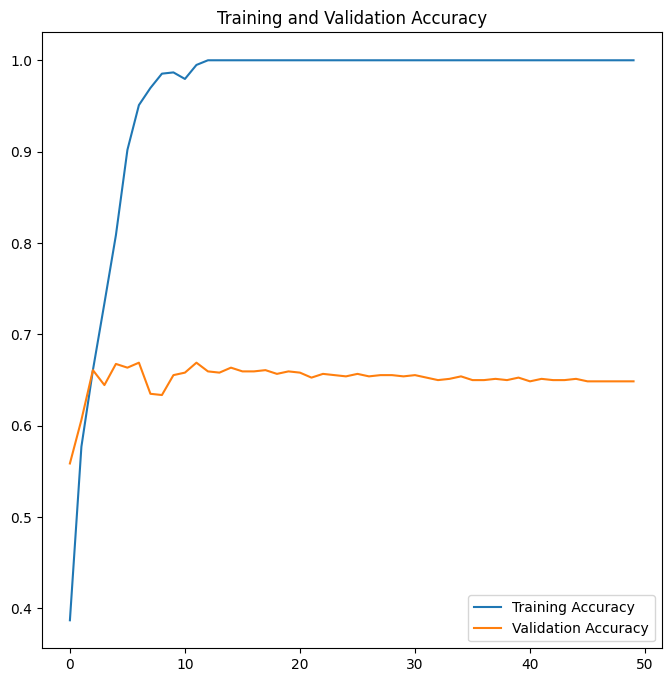

In [18]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,acc,label="Training Accuracy")

plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

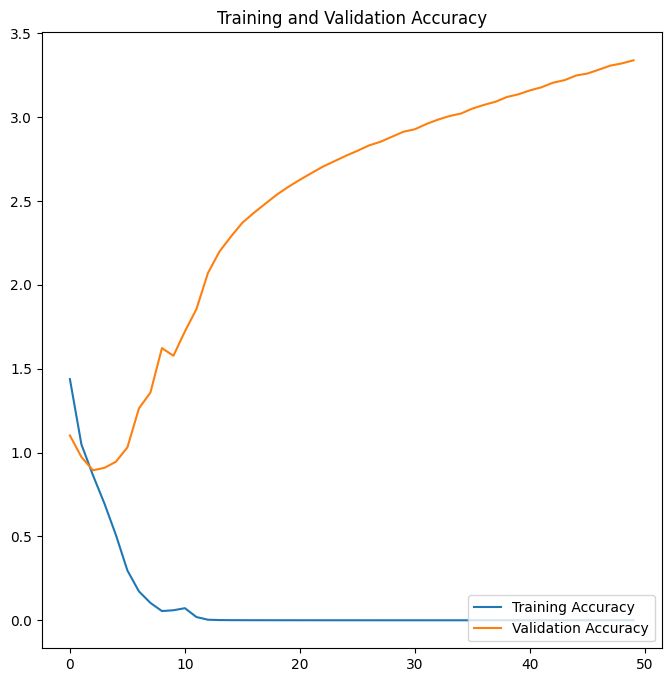

In [19]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,loss,label="Training Accuracy")

plt.plot(epochs_range,val_loss,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

In [27]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

## Training Using Tranfer Learning(DenseNet121)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
datagen = ImageDataGenerator( rescale = 1.0/255.,
                                  rotation_range=30 ,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  brightness_range=[0.6,1],
                                  fill_mode='nearest',
                                  validation_split=0.2)
train_generator = datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    subset='training' )
val_generator = datagen.flow_from_directory(data_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    shuffle=False,
                                                    subset='validation' )

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [35]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [36]:
# feature extractor
denseNet = tf.keras.applications.DenseNet121( include_top=False,
                                             weights="imagenet",
                                             input_shape=(150, 150, 3))
#freeze the base model [denseNet]
denseNet.trainable = False
#add the classifier
model=tf.keras.models.Sequential()
model.add(denseNet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               8389120   
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 15492933 (59.10 MB)
Trainable params: 84

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
epoch = 30
history = model.fit(train_generator, epochs = epoch, validation_data = val_generator, verbose = 1)

Epoch 1/30
92/92 [==============================] - 41s 378ms/step - loss: 0.3320 - accuracy: 0.8870 - val_loss: 0.5369 - val_accuracy: 0.8263
Epoch 2/30
92/92 [==============================] - 35s 383ms/step - loss: 0.2695 - accuracy: 0.9027 - val_loss: 0.6234 - val_accuracy: 0.8331
Epoch 3/30
92/92 [==============================] - 38s 409ms/step - loss: 0.2744 - accuracy: 0.8966 - val_loss: 0.5809 - val_accuracy: 0.8358
Epoch 4/30
92/92 [==============================] - 32s 345ms/step - loss: 0.2253 - accuracy: 0.9190 - val_loss: 0.6025 - val_accuracy: 0.8276
Epoch 5/30
92/92 [==============================] - 33s 352ms/step - loss: 0.2408 - accuracy: 0.9139 - val_loss: 0.6792 - val_accuracy: 0.8468
Epoch 6/30
92/92 [==============================] - 34s 372ms/step - loss: 0.1991 - accuracy: 0.9258 - val_loss: 0.6730 - val_accuracy: 0.8331
Epoch 7/30
92/92 [==============================] - 32s 348ms/step - loss: 0.1997 - accuracy: 0.9323 - val_loss: 0.5670 - val_accuracy: 0.8509

In [45]:
model.save("Flower_Image_Classification_For_5_Classes.h5")

In [48]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs_range=range(30)

Text(0.5, 1.0, 'Training and Validation Accuracy')

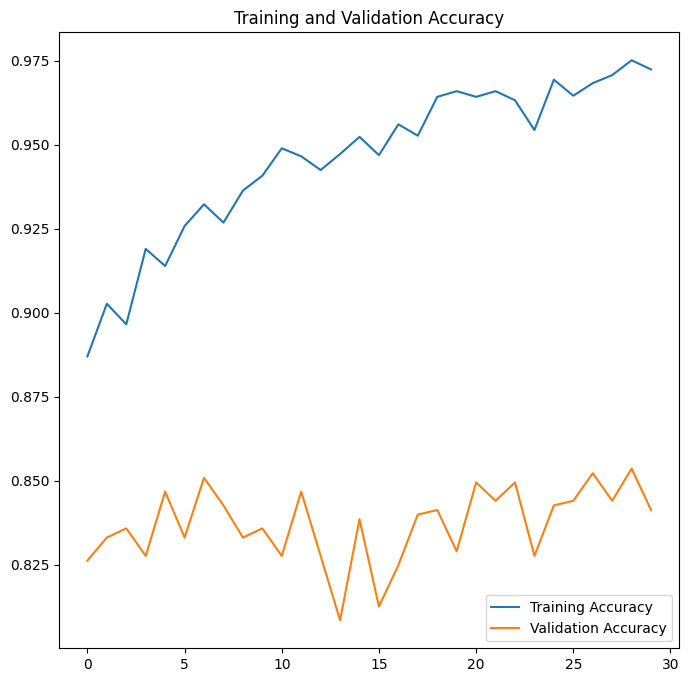

In [49]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,acc,label="Training Accuracy")

plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

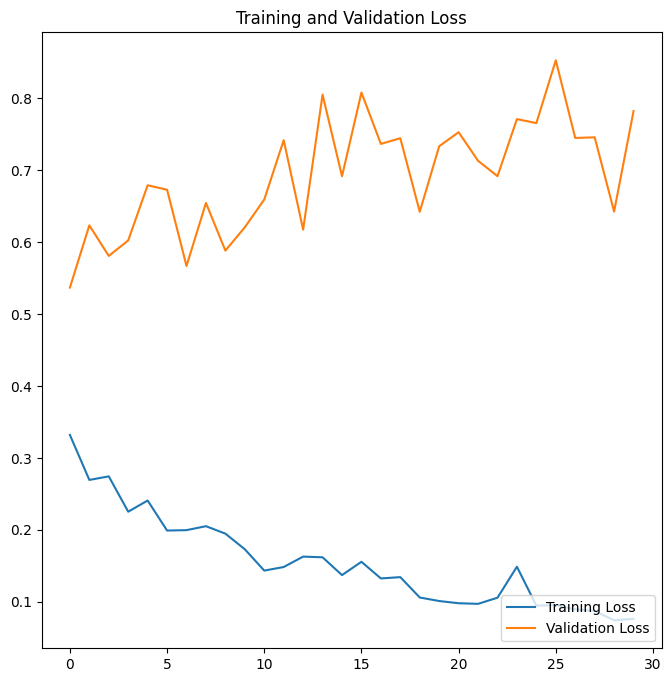

In [50]:
plt.figure(figsize=(8,8))

plt.plot(epochs_range,loss,label="Training Loss")

plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")